# Multiple regression

## Introduction

In biology, outcomes rarely depend on a single factor. From plant growth to disease risk, multiple variables interact in complex ways. While simple linear regression examines one predictor's effect on a response, it's inadequate for understanding these multifaceted scenarios. This is where **multiple regression** becomes essential, providing a statistical framework to disentangle the simultaneous effects of multiple factors.

This chapter will equip us with the tools to apply multiple regression in biological research. We'll explore how to build models that incorporate the combined influence of *several independent variables*, such as predicting species abundance based on temperature, rainfall, altitude, and competition, or modeling gene expression as a function of various factors.

We'll start by defining the mathematical model underlying multiple regression and learn how to use Python's `statsmodels` library to fit these models to our data. We'll delve into model interpretation, understanding the magnitude, direction, and significance of each predictor's effect.

We'll also explore how to evaluate model performance using R-squared, select relevant variables, assess interactions, and incorporate non-linear relationships. Furthermore, we'll visualize our models and address multicollinearity, where predictors are highly correlated.

Building on the concepts from the previous chapter on simple linear regression, we'll focus on the practical application of multiple regression using real-world examples, and highlight the key differences and new considerations that arise when dealing with multiple predictors. We'll streamline our discussion of familiar aspects and encourage you to refer back to the simple linear regression chapter for a more detailed review of those topics.

## Definitions

### What is multiple regression?

Multiple regression is a statistical technique that allows us to examine the relationship between a **single, continuous dependent variable (Y)** and **two or more independent variables (X)**. It extends the concept of simple linear regression, where only one predictor is used, to a more realistic scenario where multiple factors likely influence the outcome. Biologists often use multiple regression to:

1. Assess the impact of one variable after accounting for others: for instance, is a particular gene associated with increased disease risk *even after controlling for* age, lifestyle, and other known risk factors?
2. Create predictive models: multiple regression can generate an equation to predict the value of the outcome variable based on the values of the independent variables. This could be used to predict crop yield based on rainfall, temperature, and fertilizer use, or to estimate the probability of a species' occurrence in a new habitat.
3. Understand the relative importance of multiple factors: by comparing the strength of the relationship between each independent variable and the dependent variable, multiple regression helps to determine which factors contribute most significantly to explaining the outcome. For example, we could determine whether nutrient availability or light intensity is a stronger driver of plant growth.

### Key terminology

- Dependent variable (Y): also known as the **response variable** or **outcome variable**, this is the variable we are trying to predict or explain. In multiple *linear* regression, it must be a continuous variable (e.g., plant height, blood pressure, gene expression level).
- Independent variables (X): also known as **explanatory variables** or **predictor variables**, these are the variables we believe influence the dependent variable. They can be:
  - **Continuous**: variables measured on a continuous scale (e.g., temperature, concentration, body mass).
  - **Binary**: variables representing two categories, typically coded as 0 and 1 (e.g., presence/absence of a disease, treatment/control group).
  - **Categorical**: variables representing three or more categories (e.g., habitat type, blood type). These will need to be converted into a set of *dummy variables* for use in the model. For a variable with $k$ categories, we create $k-1$ dummy variables, each coded as 0 or 1. One category is chosen as the *reference category*, and the coefficients of the dummy variables represent the *difference* in the predicted value of Y between that category and the reference category.

While multiple regression deals with *multiple* X variables (hence sometimes being called "multivariable regression"), it is still a **univariate** technique because it only analyzes a *single* Y variable. Multivariate methods, such as *principal component analysis (PCA)* or canonical correlation analysis, analyze multiple dependent variables simultaneously, and is out of scope here.

### The mathematical model

The multiple linear regression model expresses the dependent variable as a linear combination of the independent variables, plus an error term:

$$Y_{i} = β_{0} + β_{1}X_{1i} + β_{2}X_{2i} + ... + β_{p}X_{pi} + ε_{i}$$

Where:

*   $Y_{i}$ is the value of the dependent variable for the i<sup>th</sup> individual or observation.
*   $X_{1i}$, $X_{2i}$, ..., $X_{pi}$ are the values of the independent variables for the i<sup>th</sup> individual.
*   $β_{0}$ is the **intercept**, representing the predicted value of Y when all X variables are equal to zero. It's the baseline value of the outcome.
*   $β_{1}$, $β_{2}$, ..., $β_{p}$ are the **regression coefficients** (also called **parameters** or **slopes**). Each coefficient represents the change in the predicted value of Y associated with a one-unit increase in the corresponding X variable, *holding all other X variables constant*.
*   $ε_{i}$ is the **error term** (or **residual**) for the i<sup>th</sup> individual, representing the difference between the observed value of Y and the value predicted by the model. It captures random variability and the influence of unmeasured factors.

#### Estimation

As we saw in simple linear regression, the regression coefficients (the $β$'s) in multiple regression are also estimated using the method of **Ordinary Least Squares (OLS)**. Recall that OLS seeks to find the coefficients that minimize the sum of the squared differences between the observed values of Y and the values predicted by the model. In essence, it finds the "best-fitting" line (or *hyperplane* in multiple dimensions) through the data. Fortunately, we don't have to perform these calculations manually. We'll use Python's `statsmodels.OLS` to efficiently estimate the coefficients for our multiple regression models.

#### Interpreting the coefficients

The regression coefficients ($β$ values) are the heart of the model's interpretation. Let's break down what they mean:

*   *Magnitude:* the absolute value of a coefficient indicates the strength of the relationship between that X variable and Y. A larger magnitude suggests a stronger effect.
*   *Sign:* the sign (+ or -) of a coefficient indicates the direction of the relationship:
    *   *Positive coefficient:* as the X variable increases, the predicted value of Y also increases (holding other X's constant).
    *   *Negative coefficient:* as the X variable increases, the predicted value of Y decreases (holding other X's constant).
*   *Units:* a coefficient's units are "units of Y per unit of X". For example, if $β_{1}$ = 2.5 for $X_{1}$ = temperature in degrees Celsius and Y = plant growth in cm, then a 1°C increase in temperature is associated with a 2.5 cm increase in predicted plant growth, holding all other variables constant.
*   *"Holding other variables constant" or "adjusting for":* this phrase is crucial. It highlights that a coefficient reflects the *unique* contribution of that X variable, after accounting for the effects of all other variables in the model.

#### Example

Let's say we model plant growth ($Y$) as a function of temperature ($X_{1}$) and rainfall ($X_{2}$):

$$\mathrm{Growth}_{i} = 5 + 2.5 \times \mathrm{Temperature}_{i} - 0.1 \times \mathrm{Rainfall}_{i} + ε_{i}$$

*   Intercept ($\beta_0 = 5$): a plant is predicted to grow 5 cm even with zero temperature and zero rainfall (this might be extrapolated beyond the observed data range, so be cautious).
*   Temperature coefficient ($\beta_1 = 2.5$): for every 1°C increase in temperature, plant growth is predicted to increase by 2.5 cm, *holding rainfall constant*.
*   Rainfall coefficient ($\beta_2 = -0.1$): for every 1 mm increase in rainfall, plant growth is predicted to *decrease* by 0.1 cm, *holding temperature constant*.

## Assumptions

Just like simple linear regression, multiple regression relies on certain assumptions about the data and the model. Violating these assumptions can lead to biased or inefficient estimates of the regression coefficients, invalid P values, and ultimately, incorrect conclusions about the relationships between your variables. Therefore, it's crucial to understand these assumptions and to check them before interpreting your model.

### Linearity

The relationship between each independent variable and the dependent variable needs to be linear, *after accounting for the effects of other predictors*. This means a one-unit change in an X variable is associated with a **constant change** in the predicted value of Y, regardless of the values of other predictors.

We can explore this assumption visually. Scatterplots of the dependent variable against each independent variable can be a starting point. However, these plots only reveal the *bivariate* relationship and don't account for the influence of other predictors. Therefore, they might not accurately reflect the linearity assumption in a multiple regression context.

Residual plots offer a more informative view. By plotting the residuals (the differences between observed and predicted Y values) against each independent variable and the predicted Y values, we can look for non-linear patterns. A U-shape or curve in the residuals suggests a non-linear relationship. Also, be aware of increasing or decreasing spread in the residuals, which can indicate non-linearity and violation of another assumption (homoscedasticity).

*Component-component plus residual (CCPR)* plots, also known as added variable plots, are specialized plots that help assess linearity more effectively. They isolate the relationship between each predictor and the response after adjusting for the effects of all other predictors.

Violating the linearity assumption can lead to biased estimates of regression coefficients, inaccurate predictions, and misleading conclusions.

To address non-linearity, we can apply **transformations** to the independent or dependent variables. For example, we might use a logarithmic transformation for skewed data or a square root transformation for count data. Another approach is to *include polynomial terms* in the model, such as squared or cubed terms of the independent variables, to capture curvature. This allows us to model non-linear relationships within the framework of linear regression.

We will delve deeper into residual plots and CCPR plots in the upcoming sections.

### Independence of errors

The independence of errors assumption states that the error terms (residuals) should be independent of each other. This means that the error associated with one observation does not influence the error associated with any other observation.

Violating this assumption can lead to underestimated standard errors of the coefficients, inflated t-statistics, and artificially low P values, increasing the risk of Type I errors (false positives). Why? Because if errors are correlated, the model underestimates the true variability of the estimates.

To assess the independence of errors, we first need to consider the study design. Non-independence often occurs in data with inherent structure, such as:

*   *Time series data:* observations collected over time may exhibit autocorrelation, where errors are correlated with those of neighboring observations.
*   *Repeated measures data:* multiple measurements from the same subjects can lead to correlated errors.
*   *Clustered data:* observations within the same group (e.g., students in a classroom, animals in a litter) may be more similar to each other and have correlated errors.

We can also use visual diagnostics to detect non-independence. Plotting residuals against the order of data collection can reveal patterns such as clusters or trends. Autocorrelation plots can help visualize correlations between errors at different time lags. Additionally, the **Durbin-Watson test** can be used to formally test for autocorrelation in time series data. Statsmodels automatically calculates the Durbin-Watson statistic and includes it in the summary output of the OLS regression. We can then interpret this statistic to assess the presence of autocorrelation in the residuals, with a value around 2 suggesting no autocorrelation, while values closer to 0 indicate positive autocorrelation and values closer to 4 indicate negative autocorrelation."

Addressing non-independence requires using appropriate models that account for the data structure:

*   *Time series data:* Time series models, like ARIMA models, explicitly model the autocorrelation in the data.
*   *Repeated measures/clustered data:* Mixed-effects models or *generalized estimating equations (GEEs)* account for the correlation within subjects or clusters.
*   *Generalized Least Squares:* GLS can be used in various situations to account for different correlation structures in the errors.

While a detailed exploration of these methods is beyond the scope of this book, it's important to be aware of them. If your data involves time series, repeated measures, or clustered observations, we recommend consulting resources specializing in these types of analyses to ensure you're using the most appropriate techniques."

### Homoscedasticity

The homoscedasticity assumption states that the variability of the errors should be consistent across all levels of the independent variables. Imagine plotting the residuals against the predicted values - we should see a roughly even spread of points, like a random cloud, without any noticeable patterns. If the spread of the residuals widens or narrows as the predicted values change (forming a cone or fan shape), then the homoscedasticity assumption might be violated. This is called heteroscedasticity.

When heteroscedasticity is present, our standard errors for the regression coefficients might be inaccurate. Although the coefficients themselves are still unbiased (meaning they tend to be centered around the true values), the model's uncertainty about those coefficients is misrepresented. This can lead to misleading P values and confidence intervals, potentially affecting our conclusions about which predictors are statistically significant.

How can we address heteroscedasticity?

*   *Transformations:* sometimes, transforming the dependent variable (e.g., using a log or square root transformation) can help stabilize the variance.
*   *Weighted Least Squares (WLS):* this method assigns different weights to observations based on their estimated variance, giving more weight to observations with smaller variance.
*   *Robust Standard Errors:* these methods provide more reliable standard errors even when heteroscedasticity is present.

While statistical tests like the Breusch-Pagan test and White test can formally assess homoscedasticity, we'll primarily rely on visual inspection of residual plots in this book. If you encounter potential heteroscedasticity, we encourage you to explore the more advanced techniques mentioned above.

### Normality of errors

The normality of errors assumption states that the residuals from our model should follow a normal distribution. We can visually check this by examining a **histogram** of the residuals or by creating a **Q-Q plot** (Quantile-Quantile plot). In a Q-Q plot, if the residuals are normally distributed, the points should fall approximately along a straight diagonal line.

While formal statistical tests like the *Shapiro-Wilk* test or *Kolmogorov-Smirnov* test can be used to assess normality, these tests can sometimes be overly sensitive, especially with larger sample sizes. In practice, visual inspection of the histogram and Q-Q plot often provides sufficient information for our purposes.

Why is normality important? If the errors are not normally distributed, the P values and confidence intervals associated with our regression coefficients might be inaccurate, particularly when dealing with small sample sizes. However, multiple regression is generally **robust** to moderate departures from normality, especially when we have larger datasets. This robustness is thanks to the Central Limit Theorem, which states that the sampling distribution of the coefficients tends towards normality as the sample size increases.

If we encounter substantial deviations from normality, here are a few options:

*   *Transformations:*  transforming the dependent variable (e.g., using a log or square root transformation) can sometimes help normalize the residuals.
*   *Bootstrapping:* this resampling technique can provide more accurate confidence intervals when normality is violated.
*   *Non-parametric methods:*  if transformations and bootstrapping don't suffice, we might consider non-parametric regression methods that don't rely on the normality assumption.

In many cases, simply increasing the sample size can also mitigate the impact of non-normality.

### No perfect multicollinearity

The no perfect multicollinearity assumption means that none of our independent variables should be a perfect linear combination of the others. In simpler terms, we shouldn't be able to perfectly predict one predictor just by using the others. 

Think of it like this: if we included "total cholesterol" and also "HDL cholesterol" and "LDL cholesterol" as separate predictors in a model, we'd run into a problem. Since total cholesterol is simply the sum of HDL and LDL, there's redundant information. This redundancy makes it difficult for the model to determine the independent effect of each type of cholesterol.

What happens when multicollinearity is present?

*   *Unstable coefficients:* the estimated coefficients become very sensitive to slight changes in the data, making them unreliable.
*   *Inflated standard errors:* the standard errors of the coefficients become much larger, making it harder to detect statistically significant effects.
*   *Difficult interpretation:* It becomes challenging to isolate the unique contribution of each predictor to the outcome.

While perfect multicollinearity is rare in practice, high degrees of correlation between predictors can still cause problems. We'll discuss how to detect and address multicollinearity later in this chapter.

## Real-world example

### Getting the data

We'll explore a study examining the prevalence of mental disorders among male prisoners in France. This will allow us to see how multiple regression can be used to analyze complex relationships between variables in a practical setting.

The study we'll be working with is titled ["Prevalence of mental disorders in French prisons for men" by Falissard et al. (2006)](https://bmcpsychiatry.biomedcentral.com/articles/10.1186/1471-244X-6-33). This research investigated the mental health of 800 male prisoners randomly sampled from French prisons. Here's a summary of their key findings:

*   **Diagnostic challenges:** the authors highlight the difficulties of accurately diagnosing mental disorders within the prison context, where traditional standardized interviews might not be fully adequate.
*   **Two-clinician approach:** to enhance diagnostic accuracy, they used a unique approach where each prisoner was interviewed by two clinicians, including a senior psychiatrist. One clinician used a structured clinical interview (MINI plus) for DSM-IV diagnoses, while the other conducted an open clinical interview.
*   **High prevalence rates:** the study revealed high prevalence rates for several mental disorders:
    *   Schizophrenia: 3.8% (independent diagnoses) to 6.2% (consensual diagnosis)
    *   Major depressive disorder: 17.9% to 24%
    *   Generalized anxiety disorder: 12.0% to 17.7%
    *   Drug dependence: 10.8% to 14.6%
*   **Importance of clinical judgment:** the authors concluded that combining structured interviews with open clinical assessments provides a more reliable and nuanced understanding of mental health in prisoners.

The data from this study has been obtained from a MOOC (Massive Open Online Course) on biostatistics using R. This MOOC was offered by Bruno Falissard, one of the authors of the study we're analyzing. The dataset, available through the MOOC, provides a rich source of information for our analysis.

In [1]:
import pandas as pd

# Load the dataset from the URL of the MOOC
data = pd.read_csv(
    "https://lms.fun-mooc.fr/c4x/Paris11/15001/asset/smp2.csv",
    delimiter=';',  # Specify the delimiter as ';'
)

# Display the first 5 rows of the DataFrame
data.head()

,age,prof,duree,discip,n.enfant,n.fratrie,ecole,separation,juge.enfant,place,...,subst.cons,scz.cons,char,rs,ed,dr,suicide.s,suicide.hr,suicide.past,dur.interv
0,31.0,autre,4.0,0.0,2.0,4,1.0,0.0,0.0,0.0,...,0,0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN
1,49.0,NaN,NaN,0.0,7.0,3,2.0,1.0,0.0,0.0,...,0,0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,70.0
2,50.0,prof.interm?diaire,5.0,0.0,2.0,2,2.0,0.0,0.0,0.0,...,0,0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,NaN
3,47.0,ouvrier,NaN,0.0,0.0,6,1.0,1.0,0.0,1.0,...,0,0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,105.0
4,23.0,sans emploi,4.0,1.0,1.0,6,1.0,1.0,NaN,1.0,...,0,0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,NaN


To gain a better understanding of the dataset, we'll use the `data.info()` function. This will provide us with valuable information about the data, including the number of rows and columns, the data type of each variable, and whether there are any missing values.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           797 non-null    float64
 1   prof          793 non-null    object 
 2   duree         576 non-null    float64
 3   discip        793 non-null    float64
 4   n.enfant      773 non-null    float64
 5   n.fratrie     799 non-null    int64  
 6   ecole         794 non-null    float64
 7   separation    788 non-null    float64
 8   juge.enfant   794 non-null    float64
 9   place         792 non-null    float64
 10  abus          792 non-null    float64
 11  grav.cons     795 non-null    float64
 12  dep.cons      799 non-null    int64  
 13  ago.cons      799 non-null    int64  
 14  ptsd.cons     799 non-null    int64  
 15  alc.cons      799 non-null    int64  
 16  subst.cons    799 non-null    int64  
 17  scz.cons      799 non-null    int64  
 18  char          703 non-null    

While the variable names in the dataset are in French, a [comprehensive PDF document](https://lms.fun-mooc.fr/c4x/Paris11/15001/asset/Pr_sentation_variables__tude_SMP_MOOC_R.pdf) explains each variable in detail. The summary table below will help us understand the data and conduct our analysis effectively.

| Variable     | Meaning                                                                                                                                  | Units                  |
|--------------|------------------------------------------------------------------------------------------------------------------------------------------|------------------------|
| age          | Age                                                                                                                                      | Years                  |
| prof         | Profession (agriculteur, artisan, cadre, profession intermédiaire, employé, ouvrier, autre, sans emploi)                                 | Categorical            |
| dep.cons     | Presence of depressive disorder (diagnosed by consensus of two clinicians)                                                               | Binary (0: No, 1: Yes) |
| scz.cons     | Presence of schizophrenia (diagnosed by consensus of two clinicians)                                                                     | Binary (0: No, 1: Yes) |
| grav.cons    | Severity of the inmate's psychopathology (1: normal, 2: borderline, 3: mild, 4: moderate, 5: manifest, 6: severe, 7: among the most ill) | Ordinal (1-7)          |
| n.enfant     | Number of children                                                                                                                       | Count                  |
| rs           | Novelty seeking (1: low, 2: moderate, 3: high)                                                                                           | Ordinal (1-3)          |
| ed           | Harm avoidance (1: low, 2: moderate, 3: high)                                                                                            | Ordinal (1-3)          |
| dr           | Reward dependence (1: low, 2: moderate, 3: high)                                                                                         | Ordinal (1-3)          |
| duree        | Duration of incarceration (1: Less than 1 month, 2: 1 to 6 months, 3: 6 months to 1 year, 4: 1 to 5 years, 5: 5 years or more)           | Ordinal (1-5)          |
| discip       | Disciplinary action since incarceration                                                                                                  | Binary (0: No, 1: Yes) |
| n.fratrie    | Number of siblings                                                                                                                       | Count                  |
| ecole        | Education level (1: no diploma, 2: middle school, 3: CAP, BEP, 4: high school, 5: university)                                            | Ordinal (1-5)          |
| separation   | Separation from parents for at least 6 months during childhood                                                                           | Binary (0: No, 1: Yes) |
| juge.enfant  | Followed by a children's judge before age 18                                                                                             | Binary (0: No, 1: Yes) |
| place        | Placement in a home or foster care before age 18                                                                                         | Binary (0: No, 1: Yes) |
| abus         | History of childhood abuse (physical, psychological, or sexual)                                                                          | Binary (0: No, 1: Yes) |
| ago.cons     | Presence of agoraphobia                                                                                                                  | Binary (0: No, 1: Yes) |
| ptsd.cons    | Presence of post-traumatic stress disorder                                                                                               | Binary (0: No, 1: Yes) |
| alc.cons     | Presence of alcohol abuse                                                                                                                | Binary (0: No, 1: Yes) |
| subst.cons   | Presence of substance abuse                                                                                                              | Binary (0: No, 1: Yes) |
| char         | Intensity of personality disorder (1: absent, 2: mild, 3: moderate, 4: severe)                                                           | Ordinal (1-4)          |
| suicide.s    | Suicide risk score                                                                                                                       | Score (1-6)            |
| suicide.hr   | High suicide risk                                                                                                                        | Binary (0: No, 1: Yes) |
| suicide.past | History of suicide attempt                                                                                                               | Binary (0: No, 1: Yes) |
| dur.interv   | Duration of the interview                                                                                                                | Minutes                |

To get a preliminary overview of the data, we can utilize the `data.describe()` function. This function provides descriptive statistics for each of the columns in the dataset, including the mean, standard deviation, minimum, and maximum values. This overview can be useful for understanding the distribution of the variables and identifying any potential outliers or anomalies.

In [3]:
data.describe()

,age,duree,discip,n.enfant,n.fratrie,ecole,separation,juge.enfant,place,abus,...,subst.cons,scz.cons,char,rs,ed,dr,suicide.s,suicide.hr,suicide.past,dur.interv
count,797.000000,576.000000,793.000000,773.000000,799.000000,794.000000,788.000000,794.000000,792.000000,792.000000,...,799.000000,799.000000,703.000000,696.000000,692.000000,688.000000,758.000000,760.000000,785.000000,749.000000
mean,38.899624,4.302083,0.232030,1.755498,4.286608,1.866499,0.422589,0.277078,0.228535,0.277778,...,0.265332,0.082603,1.512091,2.057471,1.865607,2.152616,0.794195,0.201316,0.284076,61.891856
std,13.280978,0.868219,0.422395,1.834044,3.441485,0.977585,0.494285,0.447837,0.420155,0.448186,...,0.441786,0.275454,0.853723,0.877948,0.871233,0.829738,1.435488,0.401248,0.451261,19.669605
min,19.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,4.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,48.000000
50%,37.000000,5.000000,0.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,60.000000
75%,48.000000,5.000000,0.000000,3.000000,6.000000,2.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,3.000000,3.000000,3.000000,1.000000,0.000000,1.000000,75.000000
max,83.000000,5.000000,1.000000,13.000000,21.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,5.000000,1.000000,1.000000,120.000000


We can retrieve some of the statistics that were highlighted in the original paper, such as the prevalence of different mental disorders. For example, we can calculate the median age (`age`), the percentage of prisoners with a diagnosis of depression (`dep.cons`) or schizophrenia (`scz.cons`), of the frequency of prisoners that had seen a children's judge before the age of 18 (`juge.enfant`). This will allow us to compare our findings with those reported in the paper and ensure that our dataset is consistent with the original study.

### Building the regression model

Let's construct a multiple regression model to analyze the relationship between the duration of the interview (`dur.interv`) and several independent variables: `age`, `dep.cons`, `subst.cons`, and `scz.cons`.

Our model can be expressed as:

$$Y_i = \beta_0 + \beta_\mathrm{age} X_{i, \mathrm{age}} + \beta_\mathrm{dep.cons} X_{i, \mathrm{dep.cons}} + \beta_\mathrm{subst.cons} X_{i, \mathrm{subst.cons}} + \beta_\mathrm{scz.cons} X_{i, \mathrm{scz.cons}} + \epsilon_i$$

where:

*   $Y_i$ represents the duration of the interview for the $i$-th participant.
*   $X_{i, \mathrm{age}}$ is the age of the $i$-th participant.
*   $X_{i, \mathrm{dep.cons}}$, $X_{i, \mathrm{subst.cons}}$, and $X_{i, \mathrm{scz.cons}}$ are dummy variables indicating the presence (1) or absence (0) of depression, substance abuse, and schizophrenia, respectively, for the $i$-th participant.
*   $\beta_0$ is the intercept, representing the predicted average duration of the interview when all independent variables are 0.
*   $\beta_\mathrm{age}$, $\beta_\mathrm{dep.cons}$, $\beta_\mathrm{subst.cons}$, and $\beta_\mathrm{scz.cons}$ are the regression coefficients, representing the *change in the average* interview duration associated with a one-unit change in the corresponding independent variable, while holding other variables constant.
*   $\epsilon_i$ is the error term for the $i$-th participant, representing the difference between the observed and predicted interview duration.

The coefficients will be interpreted as follows:

*   $\beta_\mathrm{age}$ represents the average change in interview duration for a one-year increase in age, assuming the other variables remain constant.
*   $\beta_\mathrm{dep.cons}$ represents the average difference in interview duration between those with depression (`dep.cons` = 1) and those without depression (`dep.cons` = 0), holding other variables constant.
*   Similarly, $\beta_\mathrm{subst.cons}$ and $\beta_\mathrm{scz.cons}$ represent the average differences in interview duration associated with substance abuse and schizophrenia, respectively, after adjusting for the effects of other variables in the model.
*   The Intercept $\beta_0$ represents the predicted average interview duration when all independent variables are 0. In this specific case, it might not have a direct practical interpretation since it would imply a participant with an age of 0 and no presence of the mental health conditions included in the model. However, the intercept is crucial for the mathematical definition of the regression line.

We'll now use the `statsmodels.formula.api` module to fit our multiple regression model. The process is very similar to how we used `OLS` for simple linear regression, so we won't go into the specifics again here. Instead, let's focus on applying the method and interpreting the results.

In [4]:
import statsmodels.api as sm

# Create a new DataFrame with only the relevant variables
analysis_data = data[['dur.interv', 'age', 'dep.cons', 'subst.cons', 'scz.cons']].copy()

# Drop rows with missing values in any of the selected columns
analysis_data = analysis_data.dropna()

# Define the dependent variable (Y)
y = analysis_data['dur.interv']

# Define the independent variables (X)
X = analysis_data[['age', 'dep.cons', 'subst.cons', 'scz.cons']]

# Add a constant term to the independent variables matrix for the intercept
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             dur.interv   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     11.49
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           4.69e-09
Time:                        09:03:34   Log-Likelihood:                -3260.7
No. Observations:                 747   AIC:                             6531.
Df Residuals:                     742   BIC:                             6554.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.9011      2.622     18.649      0.0

Patsy formulas allow us to express the model in a more compact and readable way.

In Patsy formulas, variable names need to follow standard Python variable naming conventions. This means they cannot contain special characters like periods (`.`) or hyphens (`-`), because they have a statistical meaning. Since our dataset includes variable names with periods, such as `dur.interv`, `dep.cons`, and `subst.cons`, we'll use Patsy's `Q()` function to *quote* these names, ensuring Patsy interprets them correctly.

In [5]:
import statsmodels.formula.api as smf

# Define the model formula using patsy syntax with the interaction term
formula = "Q('dur.interv') ~ age + Q('dep.cons') + Q('subst.cons') + Q('scz.cons')"

# Fit the OLS model using the formula and data
model = smf.ols(formula, data=analysis_data)

# Fit the model
results = model.fit()

# Print the regression results with a little different method
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.053    
Dependent Variable: Q('dur.interv')  AIC:                6531.3226
Date:               2025-01-14 09:03 BIC:                6554.4030
No. Observations:   747              Log-Likelihood:     -3260.7  
Df Model:           4                F-statistic:        11.49    
Df Residuals:       742              Prob (F-statistic): 4.69e-09 
R-squared:          0.058            Scale:              364.62   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          48.9011   2.6221 18.6493 0.0000 43.7534 54.0487
age                 0.2210   0.0571  3.8707 0.0001  0.1089  0.3330
Q('dep.cons')       7.3893   1.4478  5.1037 0.0000  4.5470 10.2316
Q('subst.cons')     5.2516   1.7432  3.0126 0.0027  1.8294  8.6737
Q('scz.cons')

We can achieve similar results using the [`pingouin` library](https://pingouin-stats.org/build/html/generated/pingouin.linear_regression.html), but it will return less detailed diagnostic values. Additionally, it is limited to handling numerical variables, which might be restrictive for some analyses. Therefore, we'll primarily use `statsmodels` for our multiple regression analyses, as it provides more comprehensive diagnostics and can handle both numerical and categorical variables.

In [44]:
import pingouin as pg

# Fit the linear regression model using Pingouin
results_pingouin = pg.linear_regression(X, y)

# Print the regression results summary
results_pingouin.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,48.901,2.622,18.649,0.000,0.058,0.053,43.753,54.049
1,age,0.221,0.057,3.871,0.000,0.058,0.053,0.109,0.333
2,dep.cons,7.389,1.448,5.104,0.000,0.058,0.053,4.547,10.232
3,subst.cons,5.252,1.743,3.013,0.003,0.058,0.053,1.829,8.674
4,scz.cons,2.273,2.523,0.901,0.368,0.058,0.053,-2.681,7.226


### Interpretation of the report

#### Overall model fit

*   *Adj. R-squared (0.053):* this tells us that the model explains approximately 5.3% of the variance in the duration of the interview (`dur.interv`). This is quite low, suggesting that the predictors in the model don't account for much of the variability in interview length. We will talk about the *R-squared* and *adjusted R-squared* in more details later in the chapter.
*   *F-statistic (11.49) P value (4.69e-09):* the F-statistic tests the overall significance of the model. The very low P value indicates that the model is statistically significant, meaning *at least one of the predictors is significantly related to the outcome*, as it tests the hypothesis that all the coefficients are 0.

#### Coefficients

This table shows the estimated coefficients or *best-fit values* for each predictor, along with their standard errors, t-statistics, P values, and 95% confidence intervals.

*   *Intercept (48.9011):* this is the estimated average `dur.interv` when all other predictors are 0. In this context, it doesn't have a meaningful real-world interpretation, as it's not possible to have an age of 0 or the absence of all the mental health conditions.
*   *age (0.2210; P = 0.0001):* for each one-year increase in age, the interview duration is estimated to increase by 0.2210 minutes, on average, holding other factors constant. The 95% CI ranges from 0.109 to 0.333. This effect is statistically significant.
*   *Q('dep.cons') (7.3893; P = 0.0000):* inmates with depression (`dep.cons` = 1) have, on average, interviews that are 7.3893 minutes longer than those without depression, controlling for other factors. This effect is also statistically significant.
*   *Q('subst.cons') (5.2516; P = 0.0027):* inmates with a substance abuse disorder have interviews estimated to be 5.2516 minutes longer than those without, holding other factors constant. This is statistically significant.
*   *Q('scz.cons') (2.2726; P = 0.3681):* the coefficient for schizophrenia is not statistically significant (P > 0.05). This suggests that, after accounting for age, depression, and substance abuse, schizophrenia is not a significant predictor of interview duration in this model.

#### Other diagnostics

*   *Omnibus, Prob(Omnibus), Skew, Kurtosis, Jarque-Bera (JB), Prob(JB):* these tests assess the **normality** of the residuals. The significant results here suggest that the residuals may not be normally distributed.
*   *Durbin-Watson (1.072):* this statistic tests for **autocorrelation** in the residuals. A value this low suggests potential positive autocorrelation, which might be expected in some types of data where observations are not completely independent (though we don't have enough information about the data collection to say for sure).
*   *Condition No. (167):* this is a measure of **multicollinearity**. While not extremely high, it's something to keep in mind, especially if we were to add more predictors to the model.

To further assess the normality of the residuals, we can visualize their distribution using a histogram and a Q-Q plot. These plots will provide a visual complement to the statistical tests reported in the regression output.

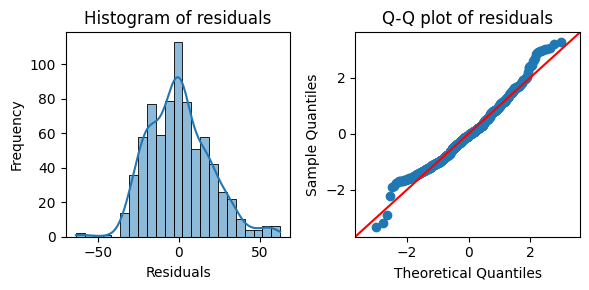

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals from the model
residuals = results.resid

# Create subplots for the histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Plot the histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_xlabel("Residuals")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of residuals")

# Plot the Q-Q plot of residuals
sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title("Q-Q plot of residuals")

plt.tight_layout();

### Visualizing regression relationships

Visualizing the relationships between our variables can help us understand the model and assess its assumptions. One useful tool is the [*partial regression plot*](https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_partregress_grid.html), which displays the relationship between the response variable and a given predictor after removing the effects of all other predictors in the model.

In essence, a partial regression plot isolates the relationship between the response and a specific predictor, allowing us to see the unique contribution of that predictor after accounting for the influence of other variables. This can be helpful for identifying non-linear patterns or unusual observations that might be affecting the model.

The code below creates a grid of partial regression plots for all the independent variables in the regression model, using the `results` object returned by the fitted regression model, which contains the necessary information for generating the plots. 

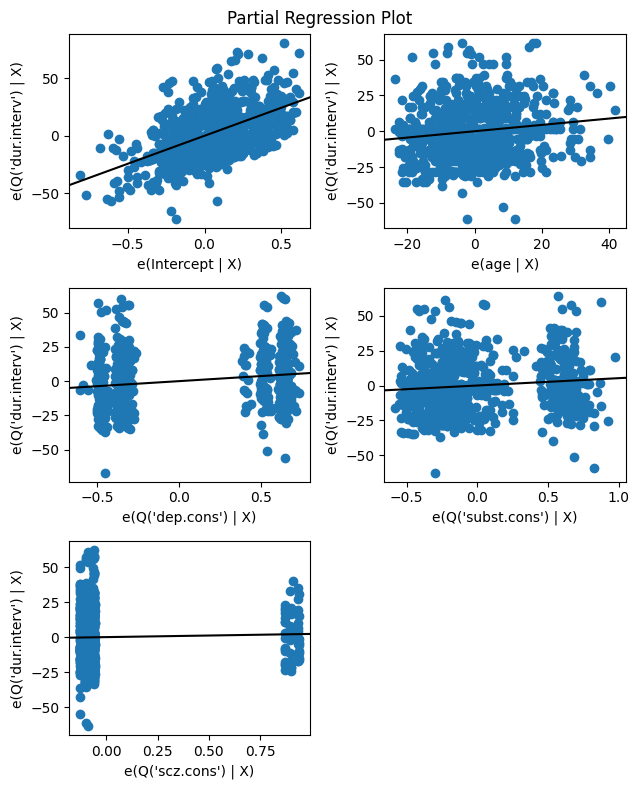

In [8]:
# Create the partial regression plot grid
fig = plt.figure(figsize=(6.5, 8))
sm.graphics.plot_partregress_grid(results, fig=fig);

A partial regression plot aims to isolate the relationship between a specific independent variable and the dependent variable, while controlling for the effects of other independent variables in the model. The slope of the line in the partial regression plot represents the change in the response variable associated with a one-unit change in the predictor, after controlling for the other variables. This is exactly what the regression coefficient represents in the table.

Furtheremore, the dependent variable (`dur.interv` in this case) is regressed on all the independent variables *except* the one for which the partial regression plot is being created. Then, the specific independent variable, e.g., `age`, is also regressed on all the other independent variables. The residuals from the first regression (involving the dependent variable) are plotted against the residuals from the second regression (involving the independent variable).

The values on both the x-axis and y-axis of a partial regression plot represent *residuals* from the two regressions described above. Since residuals can be positive or negative, it's perfectly normal to see negative values on either axis of a partial regression plot. A negative value simply means that the actual observed value was lower than the value predicted by the regression model involving the other predictors.

Another function [`sm.graphics.plot_regress_exog`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html) generates a collection of plots that illustrate the relationship between the dependent variable and a chosen independent variable within a regression model. It helps visualize how well the model fits the data, identify potential problems like non-linearity or uneven variance, and isolate the impact of the chosen independent variable on the dependent variable while accounting for other factors. For example, we can show the relationship between `dur.interv` and `age` after adjusting for the effects of `dep.cons`, `subst.cons`, and `scz.cons` as follows.

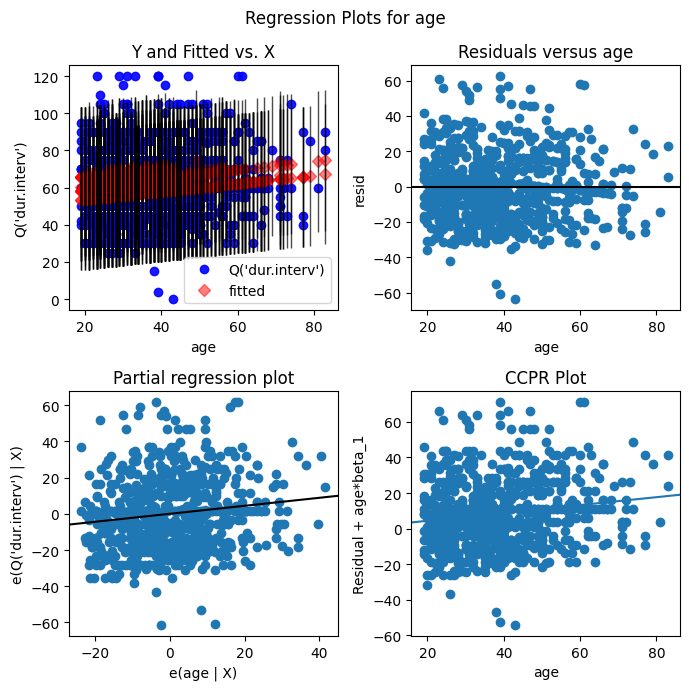

In [9]:
# Create the partial regression plot grid
fig = plt.figure(figsize=(7,7))
sm.graphics.plot_regress_exog(results, "age", fig=fig);

The grid presents a set of different plots:

*   *Y and Fitted vs. X*: this plot displays the relationship between the dependent variable and the independent variable "age". It shows both the *observed* values (Y) and the *fitted* values from the regression model against "age". This helps to visualize how well the model fits the data.
*   *Residuals vs. X*: this plot shows the residuals against the independent variable "age". It helps to detect any patterns in the residuals that might indicate violations of the model's assumptions, such as *non-linearity* or *heteroscedasticity*.
*   **Partial regression plot**: this plot displays the relationship between the dependent variable and the independent variable "age" after removing the linear effects of all other independent variables in the model. This helps to isolate the effect of "age" on the dependent variable, controlling for other factors.
*   **CCPR plot**: this is a component-component plus residual plot, which is similar to the partial regression plot but also includes the residuals. It's useful for identifying non-linearity and *influential* points.

### R-squared and adjusted R-squared

The R-squared value in our regression model is 0.058. This means that only 5.8% of the variability in `dur.interv` (interview duration) is explained by the independent variables included in our model (`age`, `dep.cons`, `subst.cons`, and `scz.cons`).

In simple linear regression with one predictor, we can easily visualize the best-fit line superimposed on a scatter plot of the data. However, with multiple regression models that have more than two independent variables, direct visualization of the best-fit line is not possible.

So how can we visualize the model fit in multiple regression? One approach is to plot the *predicted* values against the *actual* values of the *dependent variable*. Let's first calculate the predicted `dur.interv` values for each participant using our fitted model, and then create a scatter plot of the predicted values against the actual `dur.interv` values.

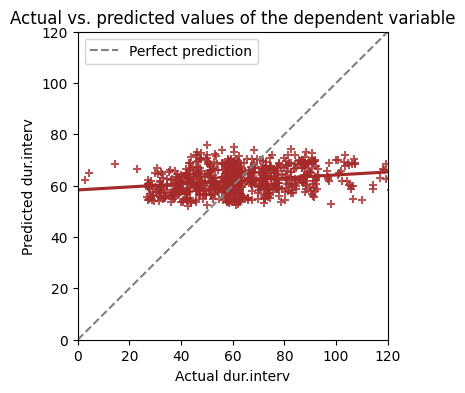

In [10]:
# Calculate predicted values
analysis_data['pred'] = results.predict(X)

# Plot predicted vs. actual Y values
plt.figure(figsize=(4,4))
sns.regplot(
    x='dur.interv',
    y='pred',
    data=analysis_data,
    ci=None,
    marker='+',
    x_jitter=3,
    y_jitter=2,
    color='brown',
)

# Add a 45-degree line
plt.plot(
    [analysis_data['dur.interv'].min(),analysis_data['dur.interv'].max()],
    [analysis_data['dur.interv'].min(), analysis_data['dur.interv'].max()],
    color='gray', linestyle='--', label='Perfect prediction')

plt.xlabel("Actual dur.interv")
plt.ylabel("Predicted dur.interv")
plt.xlim((0, 120))
plt.ylim((0, 120))
plt.title("Actual vs. predicted values of the dependent variable")
plt.legend();

This plot visually represents how well our model predicts the actual `dur.interv` values. If the prediction were perfect, all the points would align perfectly on a *45-degree line*, with the predicted values exactly matching the actual values. In our case, the points are scattered around the 45-degree line, indicating that our model's predictions are not perfect. The R-squared value of 0.058, as seen in the regression output, quantifies this imperfection.

Even if the independent variables are completely unable to predict the dependent variable, the R-squared value will typically be greater than zero. This limits the usefulness of R-squared as a sole measure of goodness-of-fit, especially with *small sample sizes* where the model might overfit the data.

**Adjusted R-squared** ($R_a^2$) provides a more realistic estimate of how well the model is expected to fit new, unseen data. It accounts for the number of independent variables in the model, penalizing the addition of unnecessary predictors that don't contribute meaningfully to explaining the variance in the dependent variable. Adjusted R-squared is always smaller than the unadjusted R-squared.

Remind the formula for adjusted R-squared $R_a^2 = 1 - (1 - R^2) \frac{n - 1}{n - p - 1}$, where:

*  $n$ is the number of observations (participants)
*  $p$ is the number of independent variables

Rules of thumb suggest that the number of participants (n) should be somewhere between *10-40 times* the number of variables (p). With approximately 800 participants in our study, we could potentially analyze up to 20 independent variables while maintaining a reasonable ratio for reliable model estimation.

In [11]:
# Get the number of observations from the fitted model object
n = results.nobs

# Get the degrees of freedom of the residuals
df_residuals = results.df_resid

# Calculate adjusted R-squared manually
adjusted_r_squared = 1 - (1 - results.rsquared) * (n - 1) / df_residuals

# Print adjusted R-squared from the manual calculation and from Statsmodels
print(f"Adjusted R-squared (manual):\t {adjusted_r_squared:.4f}")
print(f"Adjusted R-squared (Statsmodels): {results.rsquared_adj:.4f}")

Adjusted R-squared (manual):	 0.0533
Adjusted R-squared (Statsmodels): 0.0533


In this study, we have far more observation (747, after the removal of NaN values) than independent variables (4), so the adjusted R-squared is only slightly smaller than the unadjusted R-squared.

## Advanced techniques

### Improvement of the fit

In any research study, we often collect data on numerous variables. However, including all of them in a multiple regression model might not always improve the model's fit or interpretability. Sometimes, adding more variables can even lead to *overfitting*, where the model performs well on the current data but fails to generalize to new data. Let's now add a few variables and see if it improves the fit.

In [12]:
# List of variables to include in the second model
variables = [
    'age',
    'n.enfant',
    'grav.cons',
    'dep.cons',
    'ago.cons',
    'alc.cons',
    'subst.cons',
    'scz.cons'
]

# Create a new DataFrame with only the relevant variables
analysis_data_overfit = data[['dur.interv'] + variables].copy()

# Drop rows with missing values in any of the selected columns
analysis_data_overfit = analysis_data_overfit.dropna()

# Define the dependent variable (Y)
y_overfit = analysis_data_overfit['dur.interv']

# Define the independent variables (X)
X_overfit = analysis_data_overfit[variables]

# Add a constant term to the independent variables matrix for the intercept
X_overfit = sm.add_constant(X_overfit)

# Create and fit the OLS model
model_overfit = sm.OLS(y_overfit, X_overfit)
results_overfit = model_overfit.fit()

# Print the regression results summary
print(results_overfit.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:             dur.interv   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     7.891
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           3.33e-10
Time:                        09:03:36   Log-Likelihood:                -3146.2
No. Observations:                 722   AIC:                             6310.
Df Residuals:                     713   BIC:                             6352.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         


The fact that the adjusted R-squared increased from 0.058 in the simpler model to 0.071 in the more complex model tells us a couple of things:

1. *Improved model fit:* the more complex model, with its additional variables, explains a greater proportion of the variance in `dur.interv`. This suggests that the added variables (`n.enfant`, `grav.cons`, `ago.cons`, and `alc.cons`) do contribute meaningfully to predicting interview duration.
2. *Not just overfitting:* the fact that the *adjusted* R-squared increased is particularly important. It indicates that the improvement in model fit isn't simply due to adding more variables and potentially overfitting the data. The adjusted R-squared penalizes the inclusion of unnecessary predictors, so its increase suggests that the added variables genuinely improve the model's ability to generalize to new data.

However, it's important to consider that, while an increase from 0.058 to 0.071 is notable, it's still a relatively low R-squared value overall. The model still explains only a small portion of the variability in `dur.interv`. Consider whether the increase in explained variance has practical or clinical significance in the context of the study. Does this improvement in predictive power translate to meaningful insights or actionable information It might be worthwhile to further analyze the more complex model, examining the coefficients, P values, and diagnostic plots to understand the specific contributions of the added variables and ensure the model meets the assumptions of multiple regression.

### Variable selection

Deciding which variables to include in a model is a complex issue known as **variable selection**. While a full treatment of variable selection techniques is beyond the scope of this book (often falling more into the realm of *machine learning*), we'll briefly touch upon the concept here.

One common approach to variable selection is *backward-stepwise selection* (or step-down selection). In this method, we start with a model that includes all potential predictors. We then iteratively remove the variable with the highest P value (i.e., the least statistically significant predictor) and refit the model until all remaining variables have P values below a certain threshold (often 0.05).

It's important to note that while stepwise selection methods can be useful, they have limitations and should be used with caution. They don't always guarantee the best possible model, and the resulting P values might not be entirely accurate. More advanced variable selection techniques, such as *regularization methods* (LASSO, Ridge), offer more robust approaches and are often preferred in modern statistical modeling.

### Collinearity and multicollinearity

In multiple linear regression, the various input variables used can be considered 'dimensions' of the problem or model. In theory, we ideally expect dimensions to be independent and uncorrelated. Practically speaking, however, it's very challenging in large data sets to ensure that every input variable is completely uncorrelated from another.

While some correlation between input variables can be expected and tolerated in linear regression models, high levels of correlation can result in significant inflation of coefficients and inaccurate estimates of P values of coefficients.

*Collinearity* means that two input variables are highly correlated. The definition of 'high correlation' is a matter of judgment, but as a rule of thumb correlations greater than 0.5 might be considered high and greater than 0.7 might be considered extreme. Creating a simple correlation matrix or a pairplot can immediately surface high or extreme collinearity.

*Multicollinearity* means that there is a linear relationship between more than two of the input variables. This may not always present itself in the form of high correlations between pairs of input variables, but may be seen by identifying 'clusters' of moderately correlated variables, or by calculating a variance inflation factor (VIF) for each input variable where VIFs greater than 5 indicate high multicollinearity. Easy-to-use tests also exist in statistical software for identifying multicollinearity (for example the `mctest` package in R; see also [Regression diagnostics in statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html#Multicollinearity)).

Note that collinearity and multicollinearity only affect the coefficients of the variables impacted, and do not affect other variables or the overall statistics and fit of a model. Therefore, if a model is being developed primarily to make predictions and there is little interest in using the model to explain a phenomenon, there may not be any need to address this issue at all. However, in *inferential modeling* the accuracy of the coefficients is very important, and so testing of multicollinearity is essential. In general, the best way to deal with collinear variables is to remove one of them from the model (usually the one that has the least significance in explaining the outcome).

### Three-dimensional visualization

With one or two independent variables, we can visualize the relationship between the dependent and independent variables. For example, let's study the relationship between `dur.interv` and two specific predictors: `age` and `subst.cons`. This will allow us to demonstrate how to create a 3D plot of a **hyperplane**, which is a way to visualize a multiple regression model with two independent variables.

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          52.3586      2.581     20.288      0.000      47.292      57.425
age                 0.2054      0.058      3.542      0.000       0.092       0.319
Q('subst.cons')     6.1505      1.764      3.487      0.001       2.688       9.613


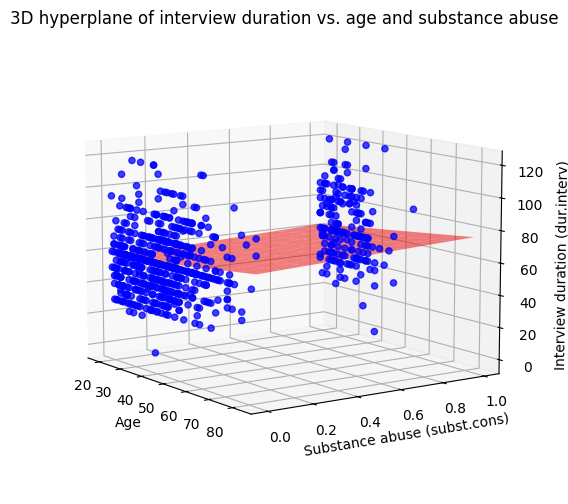

In [13]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create a new DataFrame with only the relevant variables
hyperplane_data = data[['dur.interv', 'age', 'subst.cons']].copy()

# Drop rows with missing values in any of the selected columns
hyperplane_data = hyperplane_data.dropna()

# Define the model formula using patsy syntax
formula = "Q('dur.interv') ~ age + Q('subst.cons')"

# Fit the OLS model using the formula and data
model_hyperplane = smf.ols(formula, data=hyperplane_data)
results_hyperplane = model_hyperplane.fit()

# Print the regression results summary
print(results_hyperplane.summary().tables[1])

# Create the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(
    hyperplane_data['age'],
    hyperplane_data['subst.cons'],
    hyperplane_data['dur.interv'],
    c='blue', marker='o', alpha=0.75)

# Create the hyperplane
x_surf, y_surf = np.meshgrid(
    np.linspace(hyperplane_data['age'].min(), hyperplane_data['age'].max(), 10),
    np.linspace(hyperplane_data['subst.cons'].min(), hyperplane_data['subst.cons'].max(), 10))
exog = pd.DataFrame({'age': x_surf.ravel(), 'subst.cons': y_surf.ravel()})
out = results_hyperplane.predict(exog=exog)
z_surf = out.values.reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5) # type: ignore

# Set axis labels
ax.set_xlabel("Age")
ax.set_ylabel("Substance abuse (subst.cons)")
ax.set_zlabel("Interview duration (dur.interv)") # type: ignore
ax.set_title("3D hyperplane of interview duration vs. age and substance abuse")

# Set the view angle
ax.view_init(elev=10, azim=325); # type: ignore

In [14]:
# Interactive plot using Plotly
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=hyperplane_data['age'],
            y=hyperplane_data['subst.cons'],
            z=hyperplane_data['dur.interv'],
            name='Observed',
            mode='markers',
            marker=dict(
                size=3,
                color='blue',
            )
        ),
        go.Surface(
            x=x_surf,
            y=y_surf,
            z=z_surf,
            name='Fitted',
            opacity=0.5,  # Adjust opacity as needed
            colorscale='Reds',
        )
    ]
)

fig.update_layout(
    title="3D hyperplane of interview duration vs. age and substance abuse",
    scene=dict(
        xaxis={'title':'Age'},
        yaxis={'title':'Substance abuse (subst.cons)'},
        zaxis={'title':'Interview duration (dur.interv)'},
        camera = dict(
            eye = {'x':-0.5, 'y':2, 'z':0}
        ),
        aspectmode='cube',
    )
)

fig.show()

### Interactions

In biological systems, it's common for multiple variables to interact and influence an outcome together. For instance, the impact of temperature on plant growth might be different depending on the availability of water. This interplay between variables can be modeled using **interaction** terms in multiple regression.

Interaction terms are essentially new variables created by *multiplying* two or more original independent variables. They allow us to capture how the effect of one variable might change depending on the level of another variable.

By including interaction terms, we can build more nuanced and realistic models that capture the complex interplay between variables in biological systems. Imagine we have a model predicting a student's final exam score ($\mathrm{Final}$) based on their Year 2 ($\mathrm{Yr2}$) and Year 3 ($\mathrm{Yr3}$) exam scores, including an interaction term: $\mathrm{Final} = \beta_0 + \beta_1\mathrm{Yr3} + \beta_2\mathrm{Yr2} + \beta_3\mathrm{Yr3}\mathrm{Yr2}$. Let's say the significant interaction term indicates that the effect of Year 3 score on the final exam score is different depending on the Year 2 score. We can rewrite the model equation to highlight this:

$$
\begin{aligned}
\mathrm{Final} &= \beta_0 + \beta_1\mathrm{Yr3} + \beta_2\mathrm{Yr2} + \beta_3\mathrm{Yr3}\mathrm{Yr2} \\
&= \beta_0 + (\beta_1 + \beta_3\mathrm{Yr2})\mathrm{Yr3} + \beta_2\mathrm{Yr2} \\
&= \beta_0 + \gamma\mathrm{Yr3} + \beta_2\mathrm{Yr2}
\end{aligned}
$$

where $\gamma = \beta_1 + \beta_3 \mathrm{Yr2}$.

This shows that the coefficient for $\mathrm{Yr3}$ is not constant but changes with the value of $\mathrm{Yr2}$. In other words, the effect of an extra point in the Year 3 exam on the final exam score will be different depending on how the student performed in Year 2.

Let's consider our model for predicting interview duration. We might hypothesize that the effect of depression (`dep.cons`) on interview duration could be different depending on whether the individual also has a substance abuse disorder (`subst.cons`). To model this interaction, we can add a new term to our equation:

$$Y_i = \beta_0 + \beta_1 X_{i, \mathrm{age}} + \beta_2 X_{i, \mathrm{dep.cons}} + \beta_3 X_{i, \mathrm{subst.cons}} + \beta_4 X_{i, \mathrm{scz.cons}} + \beta_{2,3} \pmb{X_{i, \mathrm{dep.cons}} X_{i, \mathrm{subst.cons}}} + \epsilon_i$$

In this equation, the term $\beta_{2,3} \pmb{X_{i, \mathrm{dep.cons}} X_{i, \mathrm{subst.cons}}}$ represents the interaction between `dep.cons` and `subst.cons`. The coefficient $\beta_{2,3}$ quantifies how the effect of depression on interview duration changes depending on the presence or absence of substance abuse.

In [15]:
# List of variables to include in the model
variables = ['age', 'dep.cons', 'subst.cons', 'scz.cons']

# Create a new DataFrame with only the relevant variables
analysis_data_interaction = data[['dur.interv'] + variables].copy()

# Drop rows with missing values in any of the selected columns
analysis_data_interaction = analysis_data_interaction.dropna()

# Create the interaction term, it's a simple mathematical multiplication
analysis_data_interaction['interaction'] = analysis_data_interaction['dep.cons'] * analysis_data_interaction['subst.cons']

# Define the dependent variable (Y)
y_interaction = analysis_data_interaction['dur.interv']

# Define the independent variables (X), including the interaction term
X_interaction = analysis_data_interaction[variables + ['interaction']]

# Add a constant term to the independent variables matrix for the intercept
X_interaction = sm.add_constant(X_interaction)

# Create and fit the OLS model
model_interaction = sm.OLS(y_interaction, X_interaction)
results_interaction = model_interaction.fit()

# Print the regression results summary
print(results_interaction.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          49.5169      2.658     18.630      0.000      44.299      54.735
age             0.2173      0.057      3.805      0.000       0.105       0.329
dep.cons        6.1578      1.698      3.627      0.000       2.825       9.491
subst.cons      3.1724      2.298      1.380      0.168      -1.340       7.685
scz.cons        1.9723      2.531      0.779      0.436      -2.996       6.941
interaction     4.4969      3.243      1.387      0.166      -1.870      10.863


If the confidence interval (CI) of the interaction term includes zero, we can conclude that there is no statistically significant interaction between `dep.cons` (depression) and `subst.cons` (substance abuse). In other words, the effect of depression on the outcome variable (e.g., interview duration) does not significantly depend on whether the individual also has a substance abuse disorder.

Note that Patsy provides two primary ways to specify interaction terms in formulas:

1. The asterisk `*` indicates that we want to include both the main effects of the variables and their interaction. For example, `A * B` would include `A`, `B`, and the interacThe colon `:` only includes the interaction term itself. For example, `A:B` would only include the interaction effect, not the main effects of `A` and `B`.tion `A:B` in the model.
2. 

In [16]:
# Define the model formula with interaction using '*'
formula_star = "Q('dur.interv') ~ age + Q('scz.cons') + Q('dep.cons') * Q('subst.cons')"

# Fit the model
model_star = smf.ols(formula_star, data=analysis_data_interaction)
results_star = model_star.fit()

# Print the results
print(results_star.summary().tables[1])

                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        49.5169      2.658     18.630      0.000      44.299      54.735
age                               0.2173      0.057      3.805      0.000       0.105       0.329
Q('scz.cons')                     1.9723      2.531      0.779      0.436      -2.996       6.941
Q('dep.cons')                     6.1578      1.698      3.627      0.000       2.825       9.491
Q('subst.cons')                   3.1724      2.298      1.380      0.168      -1.340       7.685
Q('dep.cons'):Q('subst.cons')     4.4969      3.243      1.387      0.166      -1.870      10.863


The output table from `results_star.summary2()` (using the `*` notation) will include coefficients for `dep.cons`, `subst.cons`, and their interaction `dep.cons:subst.cons`. It gives the same results as `results_interaction`.

In [17]:
# Define the model formula with interaction using ':'
formula_colon = "Q('dur.interv') ~ age + Q('scz.cons') + Q('dep.cons'):Q('subst.cons')"

# Fit the model
model_colon = smf.ols(formula_colon, data=analysis_data_interaction)
results_colon = model_colon.fit()

# Print the results
print(results_colon.summary().tables[1])

                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        52.6832      2.331     22.602      0.000      48.107      57.259
age                               0.1966      0.054      3.608      0.000       0.090       0.304
Q('scz.cons')                     2.0508      2.549      0.805      0.421      -2.953       7.054
Q('dep.cons'):Q('subst.cons')    11.2797      2.192      5.147      0.000       6.977      15.582


The output table from `results_colon.summary2()` (using the `:` notation) will only include a coefficient for the interaction term `dep.cons:subst.cons`.

The choice between `*` and `:` depends on the specific research question and whether we want to include the **main effects** along with the interaction. In most cases, including the main effects (`*` notation) is recommended, as it provides a more complete picture of the relationships between the variables.

### Quadratic and higher-order polynomial terms

In many situations, the true underlying relationship between the outcome and the input variables might be non-linear. For example, the relationship might follow a U-shape (quadratic) or an S-shape (cubic). To capture these non-linear patterns, we can include **polynomial** terms in our multiple regression model.

A polynomial term is simply an independent variable raised to a power greater than 1. For instance, a quadratic term would be $x^2$, a cubic term would be $x^3$, and so on. For example, if we suspect a quadratic relationship between an input variable $x$ and the outcome $y$, our model would take the form:

$$y = \beta_0 + \beta_1x + \beta_2x^2$$

This equation represents a parabola, allowing us to model U-shaped relationships.

We can easily incorporate polynomial terms into our `statsmodels` formulas using the `I()` function (for identity) and the power operator (`**`). For example, let's say we want to test if a quadratic model for the `age` variable improves our model fit.

In [18]:
# Define the model formula with the interaction term and quadratic term for 'age'
formula_quadratic = "Q('dur.interv') ~ age + Q('scz.cons') + Q('dep.cons') * Q('subst.cons') + I(age ** 2)"

# Fit the OLS model using the formula and data
model_quadratic = smf.ols(formula_quadratic, data=analysis_data_interaction)

# Fit the model
results_quadratic = model_quadratic.fit()

# Print the regression results summary
print(results_quadratic.summary())

                            OLS Regression Results                            
Dep. Variable:        Q('dur.interv')   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     8.010
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           2.16e-08
Time:                        09:03:37   Log-Likelihood:                -3259.6
No. Observations:                 747   AIC:                             6533.
Df Residuals:                     740   BIC:                             6566.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

When we added a quadratic term for `age` to the model, the adjusted R-squared decreased slightly, suggesting that the quadratic term doesn't meaningfully improve the model's fit. This observation highlights that increasing model complexity doesn't always lead to better results. We should carefully evaluate whether any added complexity is justified by the data and whether it truly enhances the model's explanatory power and interpretability.

### Special variables

In some cases, we might encounter variables that require special treatment in our regression model. These could include variables with *logarithmic* relationships, variables that represent cyclical patterns, or variables with other unique characteristics.

Logarithmic transformations are often used in biology to deal with data that spans several orders of magnitude or exhibits exponential growth or decay. For example, if we have a variable that represents the population size of a species, it might be more appropriate to use the logarithm of the population size in our model.

In `statsmodels`, we can easily incorporate logarithmic transformations using the `np.log()` function from the NumPy library. For example, if we want to include the logarithm of `age` in our model, we can modify our Patsy formula as follows:

In [19]:
# Define the model formula with the logarithm of 'age'
formula_log = "Q('dur.interv') ~ np.log(age) + Q('scz.cons') + Q('dep.cons') * Q('subst.cons')"

# Fit the OLS model using the formula and data
model_log = smf.ols(formula_log, data=analysis_data_interaction)

# Fit the model
results_log = model_log.fit()

# Print the regression results summary
print(results_log.summary().tables[1])

                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        28.8024      8.409      3.425      0.001      12.294      45.310
np.log(age)                       8.1036      2.251      3.600      0.000       3.684      12.523
Q('scz.cons')                     1.9757      2.534      0.780      0.436      -2.998       6.949
Q('dep.cons')                     6.1166      1.699      3.600      0.000       2.781       9.452
Q('subst.cons')                   3.1179      2.309      1.350      0.177      -1.416       7.651
Q('dep.cons'):Q('subst.cons')     4.4546      3.247      1.372      0.171      -1.920      10.829


Other types of special variables might include:

*   **Cyclical variables:** these variables represent patterns that repeat over a specific period, such as time of day or day of the year. We might need to use trigonometric functions (sine, cosine) to model these variables effectively.
*   **Interaction terms with special variables:** we can also create interaction terms that involve special variables, such as the interaction between the logarithm of a variable and another variable.

By understanding how to handle special variables, we can build more accurate and nuanced regression models that capture the unique characteristics of our data.

### Removal of intercept

In linear regression models, the intercept term ($\beta_0$) represents the estimated value of the dependent variable when all independent variables are set to zero. However, there are cases where it might make sense to remove the intercept from the model.

Removing the intercept forces the regression line to pass through the origin (0, 0). This implies that when all independent variables are zero, the dependent variable is also expected to be zero. The interpretation of the remaining coefficients changes. Without the intercept, each coefficient represents the estimated change in the dependent variable for a one-unit change in the corresponding independent variable when all other variables are zero.

In some cases, removing the intercept can improve the model's fit to the data, especially when the relationship between the variables suggests that the dependent variable should be zero when the independent variables are zero. But the decision to remove the intercept should be guided by domain knowledge and the specific research question. If there's a strong theoretical reason to believe that the relationship between the variables should be constrained to pass through the origin, then removing the intercept might be appropriate. Be carefull, removing the intercept can sometimes lead to misleading results or poor model performance, especially if the true relationship doesn't actually pass through the origin. It's essential to carefully evaluate the model's fit and the potential consequences of removing the intercept before making a decision.

To remove the intercept in `statsmodels`, we can add `- 1` to the Patsy formula:

In [20]:
# Define the model formula with the intercept removed
formula_no_intercept = "Q('dur.interv') ~ age + Q('scz.cons') + Q('dep.cons') * Q('subst.cons') - 1"

# Fit the OLS model using the formula and data
model_no_intercept = smf.ols(formula_no_intercept, data=analysis_data_interaction)

# Fit the model
results_no_intercept = model_no_intercept.fit()

# Print the regression results summary
print(results_no_intercept.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.874    
Dependent Variable:     Q('dur.interv')  AIC:                         6816.3656
Date:                   2025-01-14 09:03 BIC:                         6839.4460
No. Observations:       747              Log-Likelihood:              -3403.2  
Df Model:               5                F-statistic:                 1034.    
Df Residuals:           742              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.874            Scale:                       534.02   
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-------------------------------------------------------------------------------
age                             1.1987   0.0267 44.8706 0.0000   1.1462  1.2511
Q('scz.cons')                   5.6921   3.0553  1.8630 0.0629  

Removing the intercept led to a dramatic increase in the adjusted R-squared, indicating a much stronger relationship between the predictors and `dur.interv` when the model is forced to pass through the origin. While this improvement is notable, we should be cautious about potential overfitting and ensure that removing the intercept aligns with our understanding of the underlying relationships between the variables.

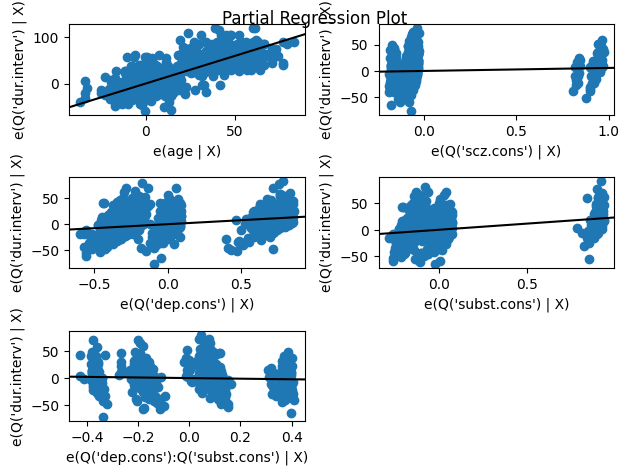

In [21]:
sm.graphics.plot_partregress_grid(results_no_intercept);

### Categorical variables

Categorical variables, also known as *factor variables*, represent qualitative data that can be divided into groups or categories. In our dataset, the variable `prof` is a categorical variable that represents the profession of the inmates. It contains 8 non-NaN classes: *agriculteur* (farmer), *artisan* (craftsman), *cadre* (manager), *profession intermédiaire* (intermediate profession), *employé* (employee), *ouvrier* (worker), *autre* (other), and *sans emploi* (unemployed).

To include a categorical variable in a regression model, we need to create dummy variables. Dummy variables are binary variables that represent each category of the categorical variable. For example, to include the variable 'prof' in our model, we would create 7 dummy variables, one for each category except for a *baseline* or *reference* category.

The choice of reference category is arbitrary and does not affect the overall fit of the model. However, it does affect the interpretation of the coefficients for the dummy variables. The coefficient for a given dummy variable represents the difference in the mean of the outcome variable between the category represented by that dummy variable and the reference category, holding all other variables constant.

In `statsmodels`, we can use the `C()` function in the formula to specify that a variable should be treated as categorical. For example, to include 'prof' as a categorical variable in our model, we would use the formula `Q('dur.interv') ~ age + C(prof)`. This would create 7 dummy variables for 'prof' and include them in the model.

Note that if 'prof' were an integer variable, we could explicitly treat it as categorical using the `C()` operator.

In [22]:
# Examine the unique categories in the 'prof' variable
print(data['prof'].unique())

['autre' nan 'prof.interm?diaire' 'ouvrier' 'sans emploi' 'artisan'
 'employ?' 'agriculteur' 'cadre']


In [23]:
# Create a new DataFrame with only the relevant variables
analysis_data_categorical = data[['dur.interv', 'age', 'dep.cons', 'subst.cons', 'scz.cons', 'prof']].copy()

# Drop rows with missing values in any of the selected columns
analysis_data_categorical = analysis_data_categorical.dropna()

# Define the model formula with 'prof' as a categorical variable
formula_categorical = "Q('dur.interv') ~ age + Q('dep.cons') + Q('subst.cons') + Q('scz.cons') + C(prof)"

# Fit the OLS model using the formula and data
model_categorical = smf.ols(formula_categorical, data=analysis_data_categorical)

# Fit the model
results_categorical = model_categorical.fit()

# Print the regression results summary
print(results_categorical.summary2())

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.052    
Dependent Variable:      Q('dur.interv')      AIC:                    6504.1550
Date:                    2025-01-14 09:03     BIC:                    6559.4834
No. Observations:        743                  Log-Likelihood:         -3240.1  
Df Model:                11                   F-statistic:            4.692    
Df Residuals:            731                  Prob (F-statistic):     5.82e-07 
R-squared:               0.066                Scale:                  365.04   
-------------------------------------------------------------------------------
                               Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
-------------------------------------------------------------------------------
Intercept                      62.7920  10.2078  6.1514 0.0000  42.7519 82.8321
C(prof)[T.artisan]            -11.4851   9.8294 -1.1685 0.2430 -

By default, statsmodels chooses the first category *alphabetically* as the reference category when creating dummy variables for a categorical variable, and the base reference level is the value of the intercept. Alternatively, we can specify the reference category directly within the Patsy formula using the [`Treatment` **contrast**](https://www.statsmodels.org/stable/examples/notebooks/generated/contrasts.html), providing a more concise way to control the reference category within the model specification itself. For example, if we want to set 'ouvrier' as the reference category for 'prof', we can use the following formula:

In [24]:
# Define the model formula with 'prof' as a categorical variable and 'ouvrier' as the reference
formula_categorical_releveled = """
Q('dur.interv') ~ age + Q('dep.cons') + Q('subst.cons') + Q('scz.cons') + C(prof, Treatment(reference='ouvrier'))
"""

# Fit the OLS model using the formula and data
model_categorical_releveled = smf.ols(
    formula=formula_categorical_releveled,
    data=analysis_data_categorical)

# Fit the model
results_categorical_releveld = model_categorical_releveled.fit()

# Print the regression results summary
print(results_categorical_releveld.summary2())

                                       Results: Ordinary least squares
Model:                              OLS                            Adj. R-squared:                   0.052    
Dependent Variable:                 Q('dur.interv')                AIC:                              6504.1550
Date:                               2025-01-14 09:03               BIC:                              6559.4834
No. Observations:                   743                            Log-Likelihood:                   -3240.1  
Df Model:                           11                             F-statistic:                      4.692    
Df Residuals:                       731                            Prob (F-statistic):               5.82e-07 
R-squared:                          0.066                          Scale:                            365.04   
--------------------------------------------------------------------------------------------------------------
                                         

The coefficient for 'agriculteur' is 14.0127, and its P value is 0.1499. This indicates that, on average, the interview duration for farmers is 14.0127 minutes longer than that for workers, keeping all other variables constant. However, this difference is not statistically significant at the 0.05 level.

## Conclusion

In this chapter, we dove into the powerful world of multiple regression, exploring its ability to unravel complex relationships between multiple predictors and a continuous outcome variable. We journeyed through the key assumptions of this method, learned how to construct and interpret models, and explored techniques to refine and visualize our analyses.

We also encountered the intricacies of variable selection, the nuances of interactions between predictors, and the potential challenges posed by multicollinearity. By grounding our exploration in a real-world dataset on mental health in French prisons, we gained practical experience in applying these concepts.

As we move forward, we'll encounter variations on the theme of regression. The next chapter introduces logistic regression, a technique designed to handle binary outcome variables—those with only two possible outcomes, such as presence or absence of a disease. We'll discover how this method allows us to model and predict probabilities, opening up a new realm of research questions we can address.

Finally, we'll delve into ANOVA (Analysis of Variance), a method closely related to multiple regression. While seemingly distinct, ANOVA can be seen as a special case of multiple regression where the predictors are categorical. This connection will deepen our understanding of both techniques and their versatility in analyzing complex biological data.

## Cheat sheet

### Building the regression model

```python
import statsmodels.formula.api as smf

# Create a new DataFrame with only the relevant variables
analysis_data = data[[y, X1, X2, X3]].copy()

# Drop rows with missing values in any of the selected columns
analysis_data = analysis_data.dropna()

# Define the model formula using patsy syntax with the interaction term
formula = "y ~ X1 + X2 + X3"

# Quote variable names that contains special characters (e.g., periods `.` or hyphens `-`)
# formula = "Q('dur.interv') ~ age + Q('dep.cons') + Q('subst.cons') + Q('scz.cons')"

# Fit the OLS model using the formula and data
model = smf.ols(formula, data=analysis_data)

# Fit the model
results = model.fit()

# Print the regression results summary
print(results.summary())
# print(results.summary2())

# Using pingouin
import pingouin as pg

y = data[y]
X = data[[X1, X2, X3]]

# Fit the linear regression model (for numerical variables)
results_pingouin = pg.linear_regression(X, y)

# Print the regression results summary
results_pingouin.round(3)
```

### Diagnostics

```python
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals from the model
residuals = results.resid

# Plot the histogram of residuals
sns.histplot(residuals, kde=True)

# Plot the Q-Q plot of residuals
sm.qqplot(residuals, line='45', fit=True)
```

### Visualizing regression relationships

```python
# Create the partial regression plot grid
sm.graphics.plot_partregress_grid(results);

;# Create the partial regression plot grid
sm.graphics.plot_regress_exog(results, X1,);
```

### Predictions

```python
# Calculate predicted values
analysis_data['pred'] = results.predict(X)
```

### Three-dimensional visualization

```python
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create a new DataFrame with only the relevant variables
hyperplane_data = data[[y, X1, X2]].copy()

# Drop rows with missing values in any of the selected columns
hyperplane_data = hyperplane_data.dropna()

# Define the model formula using patsy syntax
formula = "y ~ X1 + X2"

# Fit the OLS model using the formula and data
model_hyperplane = smf.ols(formula, data=hyperplane_data)
results_hyperplane = model_hyperplane.fit()

# Create the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(
    hyperplane_data[y],
    hyperplane_data[X1],
    hyperplane_data[X2],
)

# Create the hyperplane
x_surf, y_surf = np.meshgrid(
    np.linspace(hyperplane_data[X1].min(), hyperplane_data[X1].max(), 10),
    np.linspace(hyperplane_data[X2].min(), hyperplane_data[X2].max(), 10))
exog = pd.DataFrame({X1: x_surf.ravel(), X2: y_surf.ravel()})
out = results_hyperplane.predict(exog=exog)
z_surf = out.values.reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf)

# Set the view angle
ax.view_init(elev=10, azim=325);
```

### Interactions

```python
# Define the model formula with interaction using '*', i.e.,
# include both the main effects of the variables and their interaction
formula_star = "y ~ X1 + X2*X3"

# Define the model formula with interaction using ':'
formula_colon = "y ~ X1 + X2:X3"
# only includes the interaction term itself
```

### Quadratic and higher-order polynomial terms

```python
# Define the model formula with the quadratic term for X1 using 'identity' I()
formula_quadratic = "y ~ X1 + X2 + X3 + I(X1**2)"
```

### Special variables

```python
# Define the model formula with the logarithm of X1
formula_log = "y ~ np.log(X1) + X1"
```

### Removal of intercept

```python
# Define the model formula with the intercept removed
formula_no_intercept = "y ~ X1 + X2 + X3 - 1"
```

### Categorical variables

```python
# Define the model formula with X3 as a categorical variable
formula_categorical = "y ~ X1 +X2 + C(X3)"

# Define the model formula with 'X3 as a categorical variable and 'reference' as the reference
formula_categorical_releveled = """
y ~ X1 + X2 + C(X3, Treatment(reference='reference'))
"""
```

## Session information

The output below details all packages and version necessary to reproduce the results in this report.

In [25]:
!python --version
print("-------------")

from importlib.metadata import version

# List of packages we want to check the version
packages = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'pingouin', 'statsmodels']

# Initialize an empty list to store the versions
versions = []

# Loop over the packages
for package in packages:
    try:
        # Get the version of the package
        package_version = version(package)
        # Append the version to the list
        versions.append(package_version)
    except Exception:  # Use a more general exception for broader compatibility
        versions.append('Not installed')

# Print the versions
for package, version in zip(packages, versions):
    print(f'{package}: {version}')

Python 3.12.8
-------------
numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.9.2
seaborn: 0.13.2
pingouin: 0.5.5
statsmodels: 0.14.2
